In [1]:
import pandas as pd

data = pd.read_csv('data/train.csv')
data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [2]:
data.shape

(2000, 21)

In [3]:
import numpy as np
from matplotlib import pyplot as plt
import random

seed = 10

random.seed(seed)
np.random.seed(seed)

feature = 'battery_power'

print('feature :', feature)

x = data[feature]

m, k = 150, 5000

plt.title('feature distiribution')
plt.hist(x, bins=100)
plt.show()

feature : battery_power


<Figure size 640x480 with 1 Axes>

## 3.1 Compare one of the features between two clusters with using bootstrap

In [4]:
def bootstrap(cluster):
    cluster_mean, cluster_std = np.mean(cluster), np.std(cluster)
    print('cluster mean :', cluster_mean,', cluster std :', cluster_std)

    bootstrap_samples = np.random.choice(x, size=(m, k))

    col_means = np.mean(bootstrap_samples, axis = 0)
    bootstrap_mean, bootstrap_std = np.mean(col_means), np.std(col_means)
    plt.title('bootstrap means distiribution')
    plt.hist(col_means, bins=100)
    plt.show()

    print('general bootstrap mean :', bootstrap_mean,', general bootstrap std :', bootstrap_std)
    print('difference of means :', np.absolute(cluster_mean-bootstrap_mean))

    # pivotal method

    print('\n     Pivotal method')

    piv_lbp, piv_rbp = bootstrap_mean - 1.96*bootstrap_std, bootstrap_mean + 1.96*bootstrap_std
    plt.hist(col_means, bins=100)
    plt.hist([piv_lbp, bootstrap_mean, piv_rbp]*180, bins = 100)
    plt.show()

    print('confidence interval : [' + str(piv_lbp) + ', ' + str(piv_rbp) + ']')
    

    # non-pivotal method
    print('\n     Non-pivotal method')
    non_piv_lbp, non_piv_rbp = np.percentile(col_means, 2.5), np.percentile(col_means, 97.5)
    non_piv_mean = (non_piv_lbp + non_piv_rbp)/2
    plt.hist(col_means, bins=100)
    plt.hist([non_piv_lbp, bootstrap_mean, non_piv_rbp]*180, bins = 100)
    plt.show()
    difference = np.absolute(cluster_mean-non_piv_mean)
    print('confidence interval : [' + str(non_piv_lbp) + ', ' + str(non_piv_rbp) + ']')
    return piv_lbp, piv_rbp, non_piv_lbp, non_piv_rbp, bootstrap_mean, non_piv_mean

In [5]:
first_cluster, second_cluster = x[:700], x[-700:]

cluster mean : 1252.8728571428571 , cluster std : 442.49296311480754


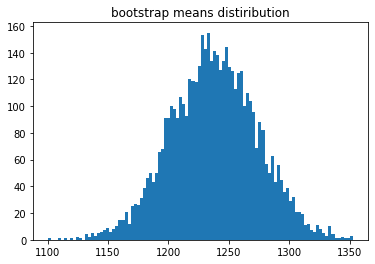

general bootstrap mean : 1237.7837133333333 , general bootstrap std : 35.881737072004874
difference of means : 15.089143809523875

     Pivotal method


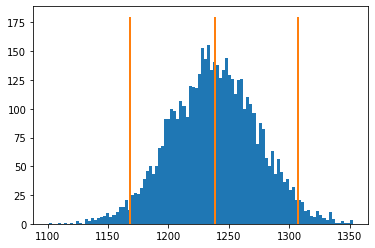

confidence interval : [1167.4555086722037, 1308.1119179944628]

     Non-pivotal method


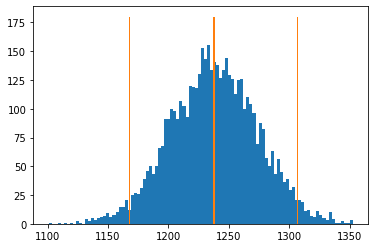

confidence interval : [1167.0614999999998, 1307.4145]


In [6]:
piv_lbp, piv_rbp, non_piv_lbp, non_piv_rbp, piv_mean, non_piv_mean = bootstrap(first_cluster)

cluster mean : 1233.142857142857 , cluster std : 439.69130683483274


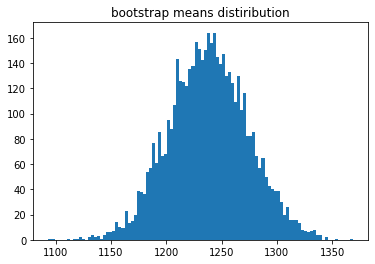

general bootstrap mean : 1238.1837893333334 , general bootstrap std : 35.69639886532063
difference of means : 5.040932190476269

     Pivotal method


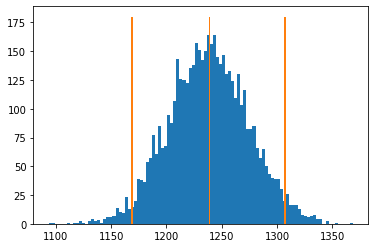

confidence interval : [1168.218847557305, 1308.1487311093617]

     Non-pivotal method


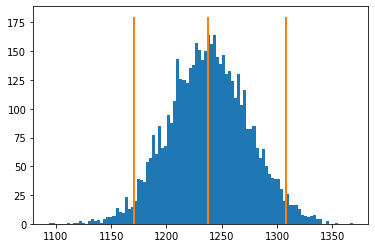

confidence interval : [1170.24, 1308.9503333333334]


In [7]:
piv_lbp_, piv_rbp_, non_piv_lbp_, non_piv_rbp_, piv_mean_, non_piv_mean_ = bootstrap(second_cluster)

In [8]:
print('means :', piv_mean, piv_mean_)
print('D :', np.absolute(piv_mean - piv_mean_))

means : 1237.7837133333333 1238.1837893333334
D : 0.40007600000012644


## 3.2. Take a feature, find the 95% confidence interval for its grand mean by using bootstrap

In [9]:
bootstrap_samples = np.random.choice(x, size=(m, k))
col_means = np.mean(bootstrap_samples, axis = 0)

# pivotal method
print('\nPivotal method')
bootstrap_mean, bootstrap_std = np.mean(col_means), np.std(col_means)
lbp, rbp = bootstrap_mean - 1.96*bootstrap_std, bootstrap_mean + 1.96*bootstrap_std
print('confidence interval : [' + str(lbp) + ', ' + str(rbp) + ']')

# non-pivotal method
print('\nNon-pivotal method')
lbp, rbp = np.percentile(col_means, 2.5), np.percentile(col_means, 97.5)
print('confidence interval : [' + str(lbp) + ', ' + str(rbp) + ']')


Pivotal method
confidence interval : [1169.0235467112175, 1309.8608692887824]

Non-pivotal method
confidence interval : [1167.9373333333335, 1309.5294999999996]


## 3.3. Take a cluster, and compare the grand mean with the within-cluster mean for the feature by using bootstrap

cluster mean : 1238.5185 , cluster std : 439.3083377967573


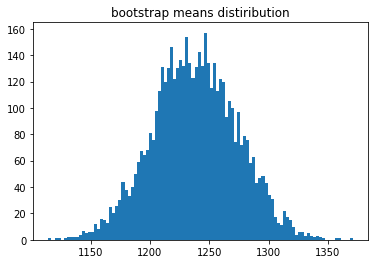

general bootstrap mean : 1238.0305106666667 , general bootstrap std : 35.64539293088235
difference of means : 0.4879893333331893

     Pivotal method


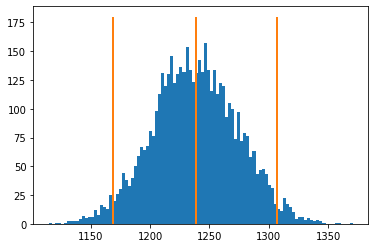

confidence interval : [1168.1655405221372, 1307.8954808111962]

     Non-pivotal method


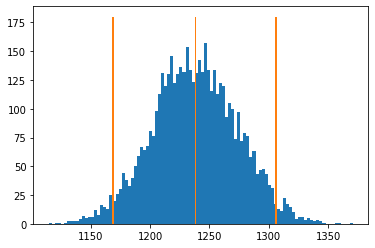

confidence interval : [1168.1331666666667, 1306.8534999999997]


In [10]:
g_piv_lbp, piv_rbp, g_non_piv_lbp, g_non_piv_rbp, g_piv_mean, g_non_piv_mean = bootstrap(x)